# MLP 실습 : 군집분석 (분류)

## library import

In [21]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
import matplotlib.cm
cmap=matplotlib.cm.get_cmap('plasma')
from sklearn.cluster import KMeans


## data 불러오기

In [8]:
data=pd.read_csv("Mall_Customers.csv") 
data.head(10)

,ID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      200 non-null    int64 
 1   Gender  200 non-null    object
 2   Age     200 non-null    int64 
 3   Income  200 non-null    int64 
 4   Spend   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
x=data.iloc[:,[3,4]]
x.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## 군집 분석 실시

- 군집 수를 변화시켜 가면서 최적의 군집 수를 파악

In [13]:
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_transform(x)
    wcss.append(kmeans.inertia_)
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25018.781613414074,
 21794.885609098194,
 19641.456216651564,
 17962.017972543283,
 16248.25073927531,
 14531.914546727781,
 13147.300563566863,
 11680.116360454418,
 11434.62315462315,
 10380.501969199377,
 9642.55438383455,
 8861.310963950797,
 8061.41093615109]

### Elbow Method

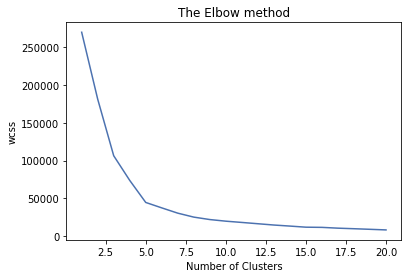

In [16]:
plt.figure()
plt.plot(range(1,21),wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()


### 군집수 k=5 결정

In [17]:
k=5
kmeans=KMeans(n_clusters=k)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

### 결과 확인하기

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

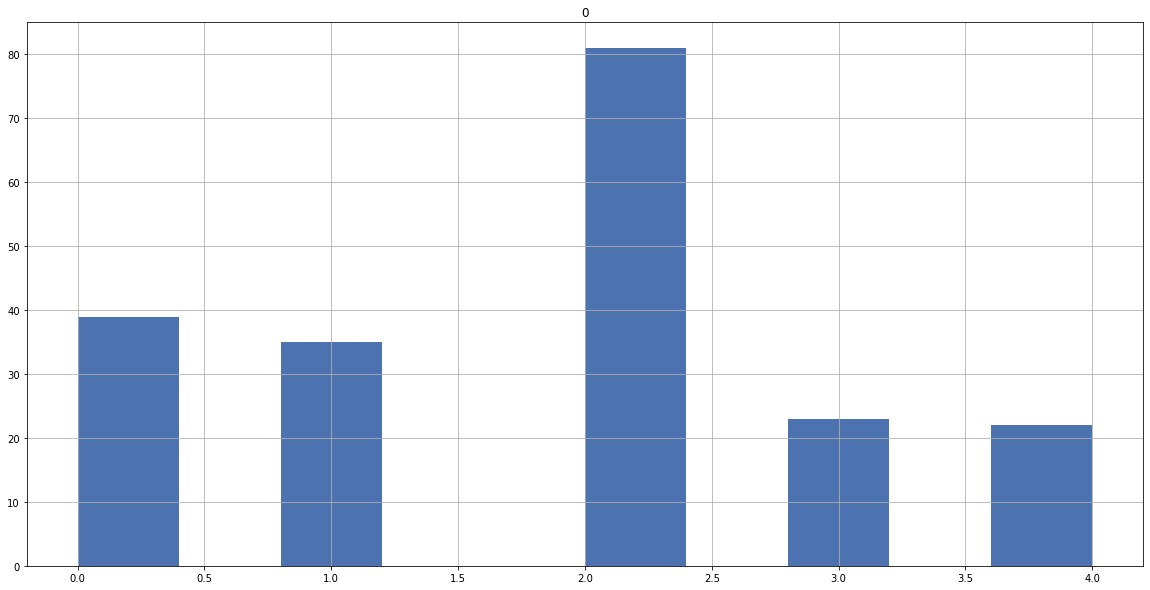

In [19]:
pd.DataFrame(y_kmeans).hist(figsize=(20,10))

### 결과 정리하기

In [22]:
# np array dataframe으로 변경하기
Group_clusters=pd.DataFrame(y_kmeans)
Group_clusters.columns=['Group']

In [24]:
full_data=pd.concat([data,Group_clusters],axis=1)

In [25]:
full_data.head(10)

,ID,Gender,Age,Income,Spend,Group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
5,6,Female,22,17,76,4
6,7,Female,35,18,6,3
7,8,Female,23,18,94,4
8,9,Male,64,19,3,3
9,10,Female,30,19,72,4


## 군집의 중심 좌표 확인하기

In [27]:
kmeans_pred=KMeans(n_clusters=k,random_state=42).fit(x)

In [28]:
kmeans_pred.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

### 소득/지출이 각각 (100,50), (30,80)인 사람이 속하는 군집 확인하기

In [29]:
kmeans_pred.predict([[100,50],[30,80]])

array([2, 0])

## 군집명 변경하기

In [31]:
labels=[('Cluster'+str(i+1))for i in range(k)]
labels

['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5']

### 군집 분포 표시하기

#### np array로 변환하기

In [33]:
X=np.array(x)

In [47]:
X[y_kmeans==4,0].shape

(22,)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

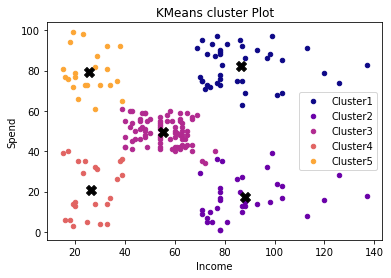

In [53]:
plt.figure()
for i in range(k):
    # X[y_kmeans==i,0] y_kmeans와 i가 일치 할때 첫번째 (인덱스 0번) 열 반환
    # X[y_kmeans==i,1] y_kmeans와 i가 일치 할때 두번째 (인덱스 1번) 열 반환
    plt.scatter(X[y_kmeans==i,0],X[y_kmeans==i,1],s=20,c=cmap(i/k),label=labels[i])
    plt.legend()

plt.xlabel("Income")
plt.ylabel("Spend")
plt.title("KMeans cluster Plot")
plt.show()

### 군집의 중심 표현하기

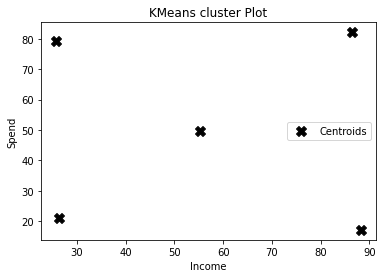

In [51]:
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="Centroids",marker="X")
plt.xlabel("Income")
plt.ylabel("Spend")
plt.title("KMeans cluster Plot")
plt.legend()
plt.show()

### 전체 결과 표현하기

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

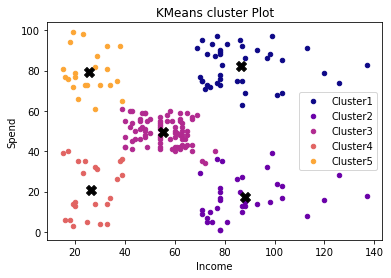

In [54]:
plt.figure()
for i in range(k):
    # X[y_kmeans==i,0] y_kmeans와 i가 일치 할때 첫번째 (인덱스 0번) 열 반환
    # X[y_kmeans==i,1] y_kmeans와 i가 일치 할때 두번째 (인덱스 1번) 열 반환
    plt.scatter(X[y_kmeans==i,0],X[y_kmeans==i,1],s=20,c=cmap(i/k),label=labels[i])
    plt.legend()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="Centroids",marker="X")

plt.xlabel("Income")
plt.ylabel("Spend")
plt.title("KMeans cluster Plot")
plt.show()

# 군집 분석 계산 과정 확인하기 (iris data 활용)

## library import

In [57]:
from scipy.spatial.distance import cdist,pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## data 불러오기 (iris)

In [58]:
iris=pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## feature/label 분류하기

In [59]:
x_iris=iris.drop(['class'],axis=1)
y_iris=iris['class']
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
x_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 변수 정규화하기

In [63]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x_iris)
x_scale=scale.transform(x_iris)
pd.DataFrame(x_scale).head(20)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


## 군집수 설정

In [74]:
K= range(1,10)
KM=[KMeans(n_clusters=k).fit(x_scale) for k in K] # 리스트에 군집 개수 별로 학습한 결과 저장하기 
centroids=[k.cluster_centers_ for k in KM]

In [75]:
KM

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

## 거리 계산 결과 확인하기

In [77]:
dist_k=[cdist(x_iris,centrds,'euclidean') for centrds in centroids ]
pd.DataFrame(dist_k)

,0
0,"[[6.345076831686122], [5.916924876994807], [5...."
1,"[[6.100007562611793, 7.340652243324334], [5.63..."
2,"[[7.340652243324334, 6.818729659590216, 5.2628..."
3,"[[6.842963183510529, 6.892127062323699, 7.9077..."
4,"[[7.40283266269816, 6.892127062323699, 5.04129..."
5,"[[6.892127062323699, 5.481435829288913, 6.3795..."
6,"[[7.374659367804045, 6.8298572400854916, 6.502..."
7,"[[6.604869059846928, 6.157264523781614, 8.0255..."
8,"[[7.284318543140332, 5.635249896707734, 6.4664..."


### 계산한 거리 중 최소값 (np.argmin) 저장

- np.argmin (최소값의 인덱스 값 반환)

출처 : https://rfriend.tistory.com/356

<img src="https://t1.daumcdn.net/cfile/tistory/998B204B5AFD0DD701">

In [85]:
cldx=[np.argmin(d,axis=1) for d in dist_k] # 최소값에 해당하는 색인 값 반환
dist=[np.min(d,axis=1) for d in dist_k] # 최소 값 반환

In [90]:
np.array(dist).shape

(9, 150)

In [91]:
# 군집의 중심과 개체들 간의 최소 거리의 평균 값 
# x_scale.shape[0] 점의 수량
avgWithinSS=[sum(d)/x_scale.shape[0] for d in dist]

In [92]:
avgWithinSS

[7.843148347309215,
 7.3105278338980195,
 6.4146813883052,
 6.447643944009036,
 6.124317560722736,
 5.64401156130649,
 5.961177993364869,
 4.906019988141015,
 5.94707227494321]

### wcss 계산 : 개체들간의 거리 제곱의 합

In [109]:
# total with-in sum of square
wcss=[sum(d**2) for d in dist] # 개체거리 제곱의 합
tss=sum(pdist(x_scale**2))/x_scale.shape[0] #전체 개체들 간의 거리 제곱합
bss=tss-wcss

In [110]:
# numpy array 제곱하기
(x_scale**2).shape

(150, 4)

In [111]:
np.array(pdist(x_scale**2)).shape

(11175,)

In [112]:
wcss

[9536.200000000004,
 8259.553731079672,
 6404.27813365259,
 6466.213586037219,
 5844.258396396341,
 4979.399461635565,
 5514.803798655395,
 3848.0468951186513,
 5493.898779716561]

In [113]:
tss

200.17832634345714

## elbow curve 그리기

### avgWithinSS : 군집내 평균 거리

Text(0.5, 1.0, 'Elbow of KMeans Clustering')

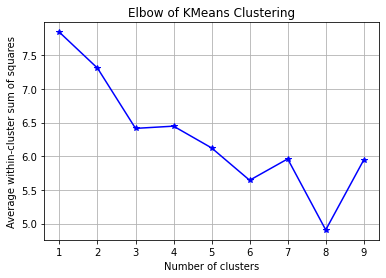

In [119]:
fig=plt.figure()
ax=fig.add_subplot(111) # subplt (1,1,1) : 1x1 grid의 첫번째 subplot
ax.plot(K,avgWithinSS,"b*-")
plt.grid(True) # 그리드 활성화
plt.xlabel("Number of clusters")
plt.ylabel("Average within-cluster sum of squares")
plt.title("Elbow of KMeans Clustering")

### 개체들간의 분산 비율

Text(0.5, 1.0, 'Elbow of KMeans Clustering')

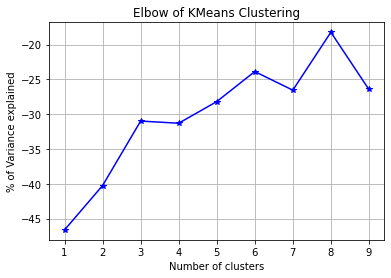

In [120]:
fig=plt.figure()
ax=fig.add_subplot(111) # subplt (1,1,1) : 1x1 grid의 첫번째 subplot
ax.plot(K,bss/tss,"b*-")
plt.grid(True) # 그리드 활성화
plt.xlabel("Number of clusters")
plt.ylabel("% of Variance explained")
plt.title("Elbow of KMeans Clustering")

## eigen value 확인하기

In [121]:
w,v = np.linalg.eig(np.array([[0.91335,0.75969],[0.75969,0.69702]]))
print("\nEigen Values\n",w)
print("\nEigen Vectors\n",v)


Eigen Values
 [1.57253666 0.03783334]

Eigen Vectors
 [[ 0.75530088 -0.6553782 ]
 [ 0.6553782   0.75530088]]


## 군집수 k=4 설정하여 모델 학습하기

In [123]:
k_means_fit=KMeans(n_clusters=4,max_iter=300) # KMeans class 변수 선언하기
k_means_fit.fit(x_scale) # 모델 학습

KMeans(n_clusters=4)

### 학습 결과 확인하기

In [124]:
k_means_fit.cluster_centers_

array([[-0.06881714, -0.89036741,  0.34501443,  0.28492552],
       [-0.70049078,  1.56529014, -1.29924123, -1.20436862],
       [ 1.13140499,  0.08716178,  0.98548265,  0.99875633],
       [-1.28213558,  0.22643209, -1.30968035, -1.29836862]])

### 실제 분류와 학습 결과 비교하기

#### KMeans 학습에 의한 분류

In [126]:
k_means_fit.labels_

array([1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### 실제 Iris 분류

In [128]:
y_iris

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [132]:
pd.crosstab(y_iris,k_means_fit.labels_)

col_0,0,1,2,3
class,,,,
Iris-setosa,0,23,0,27
Iris-versicolor,38,0,12,0
Iris-virginica,14,0,36,0


#### 전체 결과 보기

In [130]:
print("\nK-Means Clustering - Confusion Matrix\n\n",pd.crosstab(y_iris,k_means_fit.labels_,rownames=["Actual"],colnames=["Predicted"]))


K-Means Clustering - Confusion Matrix

 Predicted         0   1   2   3
Actual                         
Iris-setosa       0  23   0  27
Iris-versicolor  38   0  12   0
Iris-virginica   14   0  36   0


### silhouette score 확인하기

In [135]:
# K별로 KMeans 모델 선언 후 학습우 실루엣 점수 확인하기
for k in range(2,10):
    k_means_fitk= KMeans(n_clusters=k,max_iter=300)
    k_means_fitk.fit(x_iris)
    print("For K value",k,"Silhouette-score: %0.3f"% silhouette_score(x_iris,k_means_fitk.labels_, metric='euclidean'))

For K value 2 Silhouette-score: 0.681
For K value 3 Silhouette-score: 0.553
For K value 4 Silhouette-score: 0.497
For K value 5 Silhouette-score: 0.491
For K value 6 Silhouette-score: 0.367
For K value 7 Silhouette-score: 0.349
For K value 8 Silhouette-score: 0.353
For K value 9 Silhouette-score: 0.360


# 계층적 군집 분석 : 덴드로그램

## data 불러오기

In [138]:
data=pd.read_csv('Mall_Customers.csv')
x=data.iloc[:,[3,4]].values # array로 저장


## library import 

In [142]:
import scipy.cluster.hierarchy as sch

## model 학습

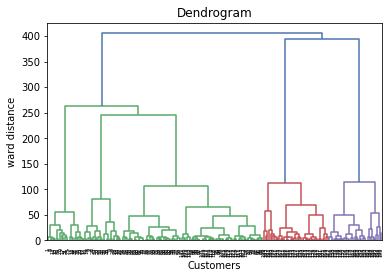

In [145]:
plt.figure(1)
z=sch.linkage(x,method="ward")
dendrogram= sch.dendrogram(z)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("ward distance")
plt.show()

## 병합군집 만들기

### model 학습시키기

In [148]:
k=5
# clustering
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="ward")
y_hc=hc.fit_predict(x)

In [150]:
hc

AgglomerativeClustering(n_clusters=5)

In [149]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### 결과 시각화

In [151]:
label=[("Cluster" + str(i+1)) for i in range(k)]

In [ ]:
plt.figure(2)
for i in range(k):
    plt.scatter(x[y_hc==i,0],x[y_hc==i,1],s=20,c=cmap(i/k),label=labels[i])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("HC Cluster Plot")